In [4]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import transforms
from torchsummary import summary
from tddl.data.sets import DatasetFromSubset
from tddl.models.wrn import WideResNet

# model = torch.hub.load('pytorch/vision:v0.10.0', 'wide_resnet50_2', pretrained=True)


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_train = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

In [20]:
dataset = datasets.FashionMNIST('/bigdata/f_mnist', train=True, download=True)

In [21]:
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, (50000, 10000), generator=torch.Generator().manual_seed(42))

train_dataset = DatasetFromSubset(
    train_dataset, transform=transform_train,
)

valid_dataset = DatasetFromSubset(
    train_dataset, transform=transform_test,
)

In [24]:
batch_size = 12

In [25]:


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)

In [26]:

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [73]:
dataiter = iter(train_loader)
dataiter_valid = iter(valid_loader)

In [66]:
images, labels = dataiter.next()

In [37]:
img_grid = torchvision.utils.make_grid(images)

In [68]:

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 0.3081 + 0.1307     # unnormalize
    if type(img) == torch.Tensor:
        npimg = img.numpy()
    else:
        npimg = img
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

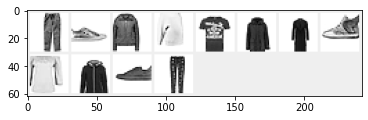

In [72]:
images, labels = dataiter.next()
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [6]:
model = WideResNet(
    depth=28,
    num_classes=10,
    widen_factor=10,
    dropRate=0.0
).cuda()

In [7]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
            Conv2d-4          [-1, 160, 28, 28]          23,040
       BatchNorm2d-5          [-1, 160, 28, 28]             320
              ReLU-6          [-1, 160, 28, 28]               0
            Conv2d-7          [-1, 160, 28, 28]         230,400
            Conv2d-8          [-1, 160, 28, 28]           2,560
        BasicBlock-9          [-1, 160, 28, 28]               0
      BatchNorm2d-10          [-1, 160, 28, 28]             320
             ReLU-11          [-1, 160, 28, 28]               0
           Conv2d-12          [-1, 160, 28, 28]         230,400
      BatchNorm2d-13          [-1, 160, 28, 28]             320
             ReLU-14          [-1, 160,